In [268]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-train/titanic_train.csv


# Purpose: analyze and prepare dataset for machine learning models

In [269]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

Application data: **titanic_train.csv** is from kaggle.

The data is about whether the passenger is alive or Alive, The **Survived** column is the target variable.

In [270]:
data = pd.read_csv('/kaggle/input/titanic-train/titanic_train.csv',sep=",")

# EDA :
Exploratory Data Analysis is done on the dataset

In [271]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Let's see if our dataset has a miss value?**

In [273]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**See miss value from heatmap chart**

Text(0.5, 1.0, 'Missing Values Heatmap')

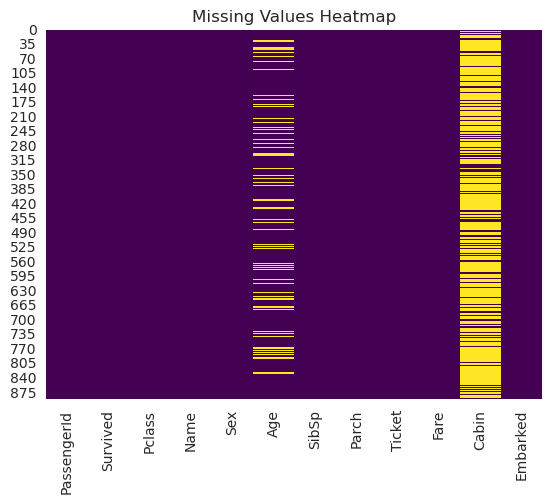

In [274]:
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')

# Visualization :

By checking The **Survived** feature, we get information from this dataset.

Text(0.5, 1.0, 'Live or dead by categorisation')

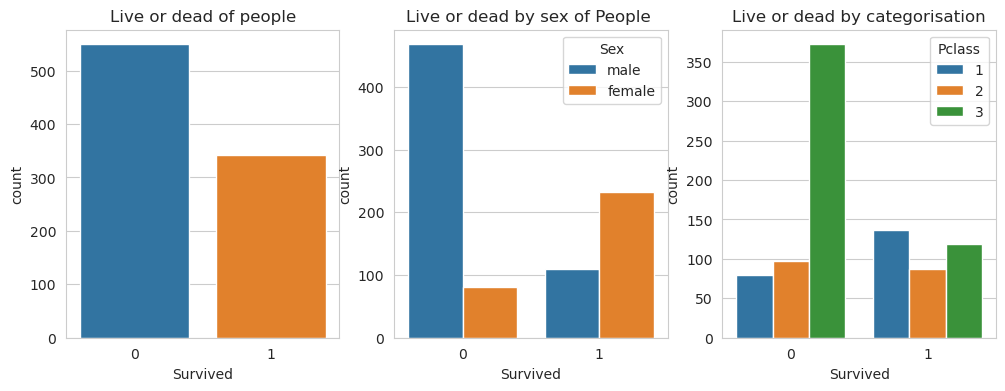

In [275]:
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)  
sns.countplot(data=data , x='Survived')
plt.title('Live or dead of people')

plt.subplot(1, 3, 2)  
sns.countplot(data=data ,hue='Sex', x='Survived')
plt.title('Live or dead by sex of People ')

plt.subplot(1, 3, 3)  
sns.countplot(data=data ,hue='Pclass', x='Survived')
plt.title('Live or dead by categorisation')

We can see the average age of individuals per class.

It's numerically accurate and graphically visible.

In [276]:
print(data[data['Pclass']==1]['Age'].mean())
print(data[data['Pclass']==2]['Age'].mean())
print(data[data['Pclass']==3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


<Axes: xlabel='Pclass', ylabel='Age'>

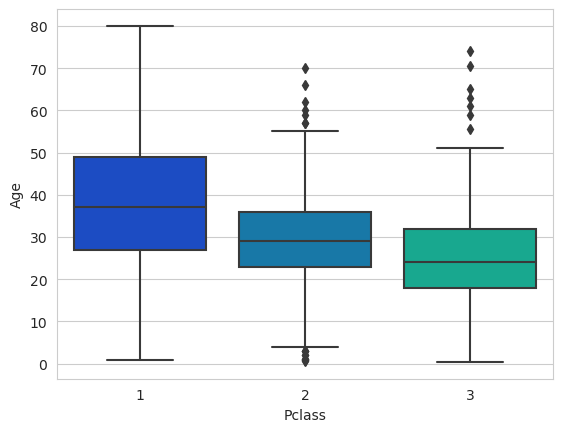

In [277]:
sns.boxplot(data=data,x='Pclass',y='Age',palette='winter')

# Data cleaning

When we did the **EDA** data, the **Miss values** that are present in each feature were identified that need to be managed.

**"Age"** , **"Cabin"** , **"Embarked"** features are managed from data that have miss value.

The **"Age"** feature is managed by the **average** method and the **Cabin**,**Embarked** features are managed by the Miss value **MOD** method.

In [278]:
def input_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1 : return 38
        elif pclass == 2 : return 29
        else: return 25
    else:
        return age

data['Age']= data[['Age','Pclass']].apply(input_age , axis=1)
data['Age'].isnull().sum()

0

In [279]:
data.drop('Cabin',axis=1,inplace=True)
idx_max_embarked = data['Embarked'].value_counts().idxmax()
data['Embarked'].replace(np.nan,idx_max_embarked,inplace=True)

In [280]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [281]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Dummy Variable

Converting **categorical to numerical** features to present to machine learning models

For this problem, which is categorical {0,1} and our target variable is survived, we need to separate the properties that affect this variable, and all of these properties need to be numerical

The characteristics that affect the goal variable **"Survived"** include:
**"Pclass","Sex","Age","Embarked","Fare"**

In [282]:
columns_to_drop = ["PassengerId", "Name", "SibSp", "Parch", "Ticket"]
data.drop(columns_to_drop, axis=1, inplace=True)

Now all that needs to be done is to use data for machine learning models **categorical** features become **numerical** features

In [283]:
embarked_dummies = pd.get_dummies(data['Embarked'], drop_first=False, prefix='Embarked')
sex_dummies = pd.get_dummies(data['Sex'], drop_first=True, prefix='Sex')
pclass_dummies = pd.get_dummies(data['Pclass'], drop_first=False, prefix='Pclass')

data = pd.concat([data, embarked_dummies, sex_dummies, pclass_dummies], axis=1)

data.drop(['Embarked', 'Sex', 'Pclass'], axis=1, inplace=True)


Let's see data set now. 
All columns must be numerical

In [284]:
data

,Survived,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,7.2500,0,0,1,1,0,0,1
1,1,38.0,71.2833,1,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,0,0,0,1
3,1,35.0,53.1000,0,0,1,0,1,0,0
4,0,35.0,8.0500,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,0,0,1,1,0,1,0
887,1,19.0,30.0000,0,0,1,0,1,0,0
888,0,25.0,23.4500,0,0,1,0,0,0,1
889,1,26.0,30.0000,1,0,0,1,1,0,0


Now this data set can be used for a machine learning model.
Machine learning model of this kind of problem is **logistic regression**

**Good luck**